In [100]:
# Import Libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [101]:
# Load dataset
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [102]:
# Get features and target
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values
X.shape,y.shape

((768, 8), (768,))

In [103]:
#Split data into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=4)

In [104]:
N1 = len(y_train)
N2 = len(y_test)
y_train = y_train.reshape((N1,1))
y_test = y_test.reshape((N2,1))

In [105]:
# Initialize variables
learning_rate = 0.1
iterations = 700
N = y_train.size

# number of input features
input_size = 8

# number of hidden layers neurons
hidden_size = 8

# number of neurons at the output layer
output_size = 2  

results = pd.DataFrame(columns=["mse", "accuracy"])

In [106]:
# Initialize weights
np.random.seed(10)

# initializing weight for the hidden layer
W1 = np.random.normal(scale=0.5, size=(input_size, hidden_size))   

# initializing weight for the output layer
W2 = np.random.normal(scale=0.5, size=(hidden_size , output_size)) 

In [107]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def mean_squared_error(y_pred, y_true):
    return ((y_pred - y_true)**2).sum() / (2*y_pred.size)
    
def accuracy(y_pred, y_true):
    acc = y_pred.argmax(axis=1) == y_true.argmax(axis=1)
    return acc.mean()

In [108]:
for itr in range(iterations):    
    
    # feedforward propagation
    # on hidden layer
    Z1 = np.dot(X_train, W1)
    A1 = sigmoid(Z1)

    # on output layer
    Z2 = np.dot(A1, W2)
    A2 = sigmoid(Z2)
    
    
    # Calculating error
    mse = mean_squared_error(A2, y_train)
    acc = accuracy(A2, y_train)
    results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
    
    # backpropagation
    E1 = A2 - y_train
    dW1 = E1 * A2 * (1 - A2)

    E2 = np.dot(dW1, W2.T)
    dW2 = E2 * A1 * (1 - A1)

    
    # weight updates
    W2_update = np.dot(A1.T, dW1) / N
    W1_update = np.dot(X_train.T, dW2) / N

    W2 = W2 - learning_rate * W2_update
    W1 = W1 - learning_rate * W1_update

C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. 

C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. 

C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. 

C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. 

C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. 

C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. 

C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. 

C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. 

C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. 

C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. 

C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. 

C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. 

C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. 

C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. 

C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. 

C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. 

C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. 

C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. 

C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. 

C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. 

C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results=results.append({"mse":mse, "accuracy":acc},ignore_index=True )
C:\Users\Ashwini\AppData\Local\Temp\ipykernel_30680\548591417.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. 

<AxesSubplot:title={'center':'Mean Squared Error'}>

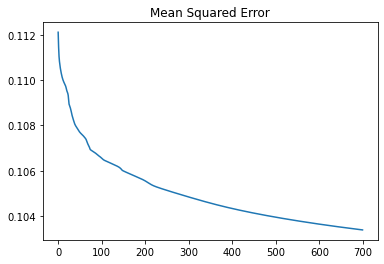

In [109]:
results.mse.plot(title="Mean Squared Error")

<AxesSubplot:title={'center':'Accuracy'}>

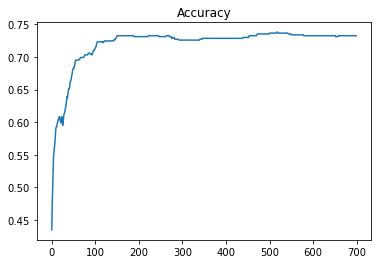

In [110]:
results.accuracy.plot(title="Accuracy")

In [111]:
# feedforward
Z1 = np.dot(X_test, W1)
A1 = sigmoid(Z1)

Z2 = np.dot(A1, W2)
A2 = sigmoid(Z2)

acc = accuracy(A2, y_test)
print("Accuracy: {}".format(acc))

Accuracy: 0.85
